In [1]:
import cv2

In [2]:
#install pip install opencv-python

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [5]:
model='frozen_inference_graph.pb'

In [6]:
mode=cv2.dnn_DetectionModel(model,file)

In [7]:
classLabels=[]
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [8]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
print(len(classLabels))

80


In [10]:
mode.setInputSize(320,320)
mode.setInputScale(1.0/127.5)
mode.setInputMean((127.5,127,5,127.5))
mode.setInputSwapRB(True)

< cv2.dnn.Model 000001A353A71170>

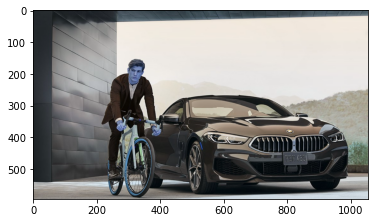

In [11]:
img = cv2.imread('cars_bikes.jpg')
plt.imshow(img)

In [12]:
ClassIndex,confidece,bbox=mode.detect(img,confThreshold=0.5)

In [13]:
print(ClassIndex)

[3 1 2]


In [14]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

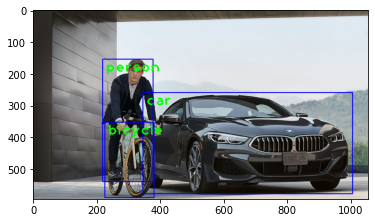

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [13]:
# video
cap=cv2.VideoCapture('pexels-george-morina.mp4')

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
   raise IOError('Cant open the video')
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    
    ClassIndex,confidece,bbox=mode.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                 cv2.rectangle(frame,boxes,(255,0,0),2)
                 cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    
    cv2.imshow('obj',frame)
    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[ 1 10  3  3  1  1  1 10  1]
[ 1 10  3  3  1  1  1 10  1]
[ 1 10  3  3  1  1  1  1 10 10]
[ 1 10  3  3  1  1  1 10 10  1  1]
[ 1 10  3  3  1  1  1  1 10 10]
[ 1  3 10  3  1  1 10  1  1]
[10  1  3  3  1  1 10  1 10]
[10  3  1  3  1  1 10  1 10]
[ 3 10  3  1  1  1  1 10 10]
[ 3 10  3  1  1  1  1 10]
[ 3 10  3  1  1  1  1 10]
[ 3 10  3  1  1  1  1  1 10]
[ 3 10  3  1  1  1  1  1 10]
[ 3 10  3  1  1 10  1  1]
[ 3 10  3  1  1  3 10  1  1  1]
[ 3 10 10  1  1  1  1]
[ 3 10  1  1 10  1  1  3]
[ 3 10  1 10]
[ 3 10  1  1  1  1 10  3]
[ 3 10  1  1  1  1  3  3  1]
[ 3 10  1  1  1  1  1  3  3]
[ 1  3  1 10  1  1  1  3]
[10  1  1  1  3  1 10  1]
[10  1  1  1  1  3  1 10  3]
[ 1 10  1  1  1  3 10  1  3  3]
[ 1 10  1  1  1  3  3 10  3]
[ 1 10  1  1  1  3 10  3  1]
[ 1 10  1  1  3  3  1  3 10  3]
[10  1  3  3  3  3 10]
[10  1  3  3  1 10  1  3]
[10  1  3  1 10  3]
[10  1  1  3  1  3 10  3]
[10  1  1  3  3  3  3]
[10  1  3  3  3  3  1  1]
[ 1 10  1  1  3  3 10  3]
[10  1  3  3  3  3 10  1]
[ 1 10  3  3 

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
